# IMEC2001 Herramientas Computacionales 
## Semana 4: Raíces de Ecuaciones
### Clase 7:  Raíces

Universidad de los Andes — Abril 26, 2023.

---

## TABLA DE CONTENIDO

### Sección 1: Raíces [→](#section1)
- 1.1. Introducción
- 1.2. Cargar Librerías
- 1.3. Ecuaciones No Lineales
- 1.4. Método Visual
- 1.5. Aplicación con `numpy.roots``
- 1.6. Aplicación con `scipy.optimize.fsolve`
- 1.7. Aplicación con `scipy.optimize.root_scalar``
- 1.8. Aplicación Simbólica con `sympy`
___

<a id="section1"></a>
# Sección 1: Raíces

## 1.1. Introducción

Determinar las *raíces* (soluciones) de una ecuación hace referencia a calcular los valores de $x$ que cumplen:

$$
f(x) = 0
$$

Notemos que ejercicios de la forma $g(x) = h(x)$ también valen, porque reescritos de otra forma, se tiene lo siguiente:

$$
g(x) - h (x) = 0
$$

<img src='./img/roots.png' width='350'/>

Figura tomada de [Aprendercurso - Método Secante](https://aprendercurso.com/metodo-de-la-secante-mucho-mas-sencillo.html). <br><br>

Dependiendo de la función $f(x)$ con la que estemos trabajando, la determinación de las raíces puede llegar a ser complejo y laborioso si se realiza a mano. Por lo tanto, una solución efectiva es optar por métodos numéricos que computacionalmente son provechosos.

Los métodos numéricos más utilizados son:
- Newton-Raphson
- Bisección
- Trisección
- Secante
- Matriz por vector (más adelante lo veremos)
- Gauss-Jordan
- Falsa posición

Aquí veremos cómo sacarle provecho a los desarrollos realizados con las librerías `numpy`, `scipy` y `sympy`.

## 1.2. Cargar Librerías

Primero, asegurémonos de haber instalado las librerías:

> ```python
  !pip install numpy
  !pip install scipy
  !pip install sympy
  ```

In [1]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Raíces
import numpy as np
from scipy import optimize
import sympy

## 1.3. Ecuaciones No Lineales


Una **ecuación lineal** es aquella que involucra una o más variables de primer grado (es decir, a la primera potencia) y no contiene productos entre las variables. Entonces:


<div class="alert alert-block alert-success">
    
> Una ecuación lineal es aquella que involucra solamente sumas y restas de una variable a la primera potencia.
</div>

Luego, un ejemplo de una ecuación **no** lineal y su solución, es el caso conocido de la *fórmula cuadrática*:

Para la ecuación:
$$
ax^2 + bx + c = 0
$$

La solución (*fórmula cuadrática*) es:

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

Utilizando números, tenemos lo siguiente:

$$
x^2 - 7x + 12 = 0
$$

Entonces, si: $a$ = 1, $b = -7$ y $c = 12$:

$$
x = \frac{-(-7) \pm \sqrt{(-7)^2 - (1)(12)}}{2(1)} = \frac{7 \pm 1}{2}
$$

Obtenemos dos soluciones: $x = 4$ y $x = 3$.

In [2]:
# Fórmula Cuadrática
def f_cuadratica(a, b, c):
    sol_suma = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    sol_resta = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)

    return [sol_suma, sol_resta]

# Ejemplo
ejm = f_cuadratica(a=1, b=-7, c=12)
ejm

[4.0, 3.0]

¿Pero qué pasa si la ecuación es más compleja de trabajar? 

Por ejemplo:

$$
e^x - x^3 = 0
$$

Dado que manualmente es más dispendioso, saquémosle provecho a las librerías `numpy.roots` y `scipy.optimize.fsolve`.

## 1.4. Método Visual

Una de las primeras aproximaciones para conocer las raíces es a través de la inspección visual. Para esto, realizamos una gráfica de la ecuación $f(x)$.

Por ejemplo, para el caso:

$$
f(x) = 5 - x^2
$$

In [3]:
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc=True)
    
    plt.tight_layout;

In [4]:
def f(x):
    return 5 - x**2

x = np.linspace(start=-5, stop=5, num=50)
x

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [5]:
y = f(x)
y

array([-20.        , -18.00083299, -16.0849646 , -14.25239484,
       -12.5031237 , -10.83715119,  -9.2544773 ,  -7.75510204,
        -6.33902541,  -5.0062474 ,  -3.75676801,  -2.59058726,
        -1.50770512,  -0.50812162,   0.40816327,   1.24114952,
         1.99083715,   2.65722616,   3.24031653,   3.74010829,
         4.15660142,   4.48979592,   4.7396918 ,   4.90628905,
         4.98958767,   4.98958767,   4.90628905,   4.7396918 ,
         4.48979592,   4.15660142,   3.74010829,   3.24031653,
         2.65722616,   1.99083715,   1.24114952,   0.40816327,
        -0.50812162,  -1.50770512,  -2.59058726,  -3.75676801,
        -5.0062474 ,  -6.33902541,  -7.75510204,  -9.2544773 ,
       -10.83715119, -12.5031237 , -14.25239484, -16.0849646 ,
       -18.00083299, -20.        ])

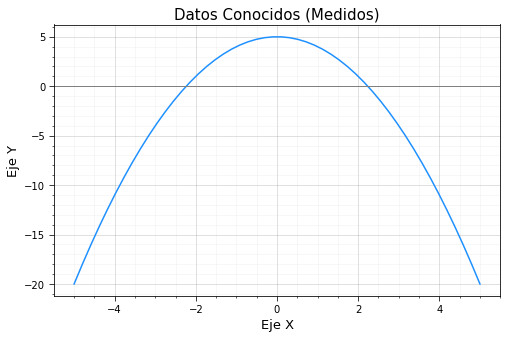

In [6]:
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='-', color='dodgerblue')
plt.axhline(0, color='grey', linewidth=1)

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y',
                leyenda=False)

A primera vista, podemos decir que las raíces están en $x_1 = -2.25$ y $x_2 = 2.25$. Verifiquemos visualmente.

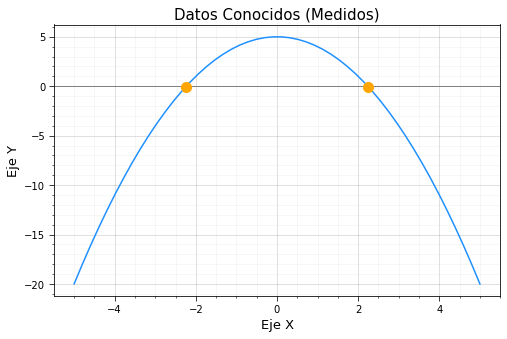

In [7]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='-', color='dodgerblue')
plt.axhline(0, color='grey', linewidth=1)

# Raíces
x1 = -2.25
y1 = f(x1)

x2 = 2.25
y2 = f(x2)

plt.plot(x1, y1, marker='o', ms='10', color='orange')
plt.plot(x2, y2, marker='o', ms='10', color='orange')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y',
                leyenda=False)

<div class="alert alert-block alert-warning">   

**SU TURNO**

Implemente el método gráfico para el caso:

$$
5x^5 - x + 3x^2 - x^3 = 0
$$
</div>

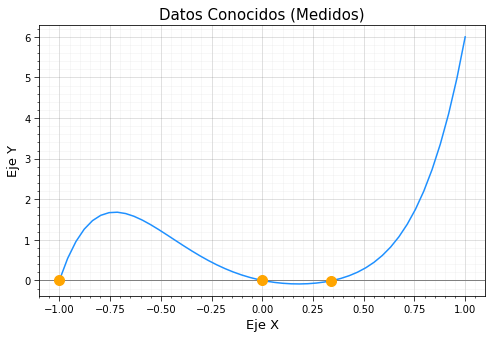

In [8]:
def f2(x):
    return 5*x**5 - x +  3*x**2 - x**3

x = np.linspace(start=-1, stop=1, num=50)
y = f2(x)

hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='-', color='dodgerblue')
plt.axhline(0, color='grey', linewidth=1)

# Raíces
x1 = -1
y1 = f2(x1)

x2 = 0
y2 = f2(x2)

x3 = 0.34
y3 = f2(x3)

plt.plot(x1, y1, marker='o', ms='10', color='orange')
plt.plot(x2, y2, marker='o', ms='10', color='orange')
plt.plot(x3, y3, marker='o', ms='10', color='orange')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y',
                leyenda=False)

## 1.5. Aplicación con `numpy.roots`

La función `numpy.roots` aplica únicamente para polinomios del tipo:

$$
f(x) = ax^n + bx^{n-1} + \dots + c
$$

La sintaxis requiere que $f(x)$ esté organizado partiendo de la mayor potencia hasta la menor potencia. Además, tan solo se necesitan los coeficientes.

Por ejemplo, para el primer caso:

$$
f(x) = 5 - x^2
$$

Debemos extraer los coeficientes de forma descendente según la potencia, es decir:

```python
coef = [-1, 0, 5]
```

Note que para esta librería tan solo necesitamos los coeficientes del polinomio para obtener **todas** las raíces.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `numpy.roots` dando clic [aquí](https://numpy.org/doc/stable/reference/generated/numpy.roots.html).
</div>

In [9]:
# PASO 1. Extraer coeficientes
coef = [-1, 0, 5]
coef

[-1, 0, 5]

In [10]:
# PASO 2. Calcular raíces
raices = np.roots(coef)
raices

array([ 2.23606798, -2.23606798])

Otra forma similar es a partir de la función `numpy.poly1d` que utilizamos en la clase `C5_ajustedatos.ipynb`.

In [11]:
# PASO 1. Creamos el polinomio a partir de los coeficientes **organizados**
poli = np.poly1d(coef) 
poli

poly1d([-1,  0,  5])

In [12]:
# PASO 2. Calcular raíces con `np.poly1d(coef).r`
raices = poli.r
raices

array([ 2.23606798, -2.23606798])

<div class="alert alert-block alert-warning">   

**SU TURNO**
    
Implemente la función `numpy.roots` para el caso:

$$
5x^5 - x + 3x^2 - x^3 = 0
$$
</div>

In [13]:
# PASO 1. Extraer coeficientes
coef = [5, 0, -1, 3, -1, 0]

# PASO 2. Calcular raíces
raices = np.roots(coef)
raices

array([-1.        +0.j       ,  0.3254011 +0.6832682j,
        0.3254011 -0.6832682j,  0.34919779+0.j       ,
        0.        +0.j       ])

## 1.6. Aplicación con `scipy.optimize.fsolve`

A diferencia de `numpy.roots`, la función `scipy.optimize.fsolve` aplica para cualquier polinomio.

Sin embargo, `scipy.optimize.fsolve` requiere que indiquemos un valor cercano a la raíz para poder estimar este valor. En general, **requiere $n$ estimaciones para $n$ raíces**.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.optimize.fsolve` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).
</div>

Para el primer caso, tenemos:

$$
f(x) = 5 - x^2
$$

Y habíamos estimado, por inspección visual, que las raíces estaban cercanas a $-2.25$ y $2.25$.

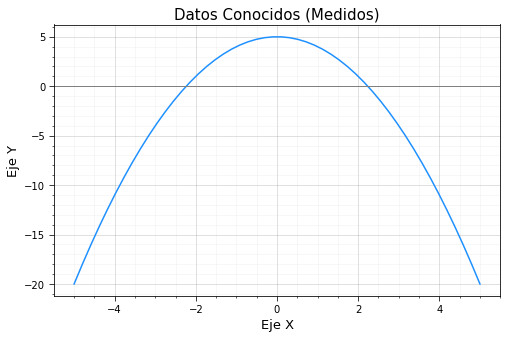

In [14]:
fig1

In [15]:
# PASO 1. Definir la función
def f(x):
    return 5 - x**2

In [16]:
# PASO 2. Indicar valor cercano a la raíz
x_estimado = -2.5

In [17]:
# PASO 3. Estimar raíz
raices = optimize.fsolve(func=f, # Como entrada requiere la función f (como en E5 P2 de AC3)
                         x0=x_estimado)

raices

array([-2.23606798])

Ahora, si queremos estimar las $n$ raíces, debemos indicar $n$ valores cercanos.

In [18]:
# PASO 2. Indicar valor cercano a la raíz
x_estimados = [-2.5, 2.5]

In [19]:
# PASO 3. Estimar raíces
raices = optimize.fsolve(func=f, # Como entrada requiere la función f (como en E5 P2 de AC3)
                         x0=x_estimados)

raices

array([-2.23606798,  2.23606798])

<div class="alert alert-block alert-warning">   

**SU TURNO**
    
Implemente la función `scipy.optimize.fsolve` para el caso:

$$
5x^5 - x + 3x^2 - x^3 = 0
$$
</div>

In [20]:
# PASO 1. Definir la función
def f(x):
    return 5*x**5 - x + 3*x**2 - x**3

# PASO 2. Indicar valor cercano a la raíz
x_estimados = [-1, 0, 0.5]

# PASO 3. Estimar raíces
raices = optimize.fsolve(func=f, # Como entrada requiere la función f (como en E5 P2 de AC3)
                         x0=x_estimados)

raices

array([-1.        ,  0.        ,  0.34919779])

## 1.7. Aplicación con `scipy.optimize.root_scalar`

Otra opción válida es a partir de la función `scipy.optimize.root_scalar` que, a diferencia de `scipy.optimize.fsolve`, debemos **indicar el rango donde se encuentra una única raíz**, en lugar de indicar el valor cercano a la raíz.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.optimize.root_scalar` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html).
</div>

Para el primer caso, tenemos:

$$
f(x) = 5 - x^2
$$

Por inspección visual sabemos que las raíces estaban cercanas a $-2.25$ y $2.25$, es decir, en el rango $[-3, 3]$, *grosso modo*.

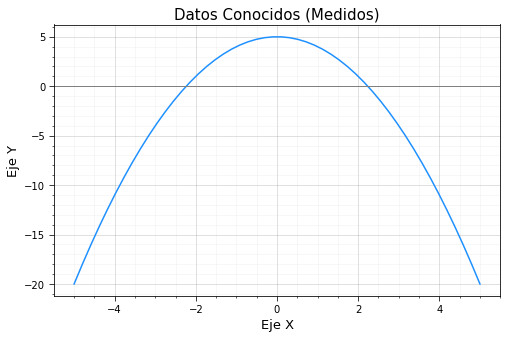

In [21]:
fig1

In [22]:
# PASO 1. Definir la función
def f(x):
    return 5 - x**2

In [23]:
# PASO 2. Indicar el rango donde se encuentra la raíz
rango = [-3, 0]

In [24]:
# PASO 3. Estimar raíces
raices = optimize.root_scalar(f,
                              bracket=rango,
                              method='bisect')

raices

      converged: True
           flag: 'converged'
 function_calls: 43
     iterations: 41
           root: -2.2360679775006247

Notemos que en este caso tenemos el parámetro `method='bisect'`, esto quiere decir que estamos determinando la raíz a partir del **método de bisección**.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información del Método de la Bisección dando clic [aquí](https://www.youtube.com/watch?v=MlP_W-obuNg).
</div>

Ahora bien, para determinar la otra raíz debemos modificar el rango, así:

In [25]:
raices = optimize.root_scalar(f,
                              bracket=[0, 3],
                              method='bisect')

raices

      converged: True
           flag: 'converged'
 function_calls: 43
     iterations: 41
           root: 2.2360679775006247

<div class="alert alert-block alert-warning">   

**SU TURNO**
    
Implemente la función `scipy.optimize.root_scalar` para el caso:

$$
5x^5 - x + 3x^2 - x^3 = 0
$$
</div>

In [26]:
# PASO 1. Definir la función
def f(x):
    return 5*x**5 - x + 3*x**2 - x**3

# PASO 2. Indicar valor cercano a la raíz
rango1 = [-1, -0.75]
rango2 = [-0.5, 0.1]
rango3 = [0.2, 0.5]

# PASO 3. Estimar raíces
raiz1 = optimize.root_scalar(f,
                             bracket=rango1,
                             method='bisect')

raiz2 = optimize.root_scalar(f,
                             bracket=rango2,
                             method='bisect')

raiz3 = optimize.root_scalar(f,
                             bracket=rango3,
                             method='bisect')

print(raiz1, '\n\n', raiz2, '\n\n', raiz3)

      converged: True
           flag: 'converged'
 function_calls: 2
     iterations: 1
           root: -1.0 

       converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: 3.637793769920942e-13 

       converged: True
           flag: 'converged'
 function_calls: 40
     iterations: 38
           root: 0.3491977932400915


## 1.8. Aplicación Simbólica con `sympy`

La forma en como podemos expresar las ecuaciones en código de forma 'similar a cuando la escribimos en una hoja' es de forma **simbólica**.

La librería de Python que permite definir variables en forma simbólica es `sympy`. Esto se realiza mediante la función `sympy.Symbol`.

A partir de las variables simbólicas y, empleando la función `sympy.solvers.solveset.nonlinsolve`, podemos encontrar las raíces de una ecuación **no** lineal (para poder calcular las raíces de una función lineal, debemos utilizar la función `sympy.solvers.solveset.linsolve`).

El flujo de trabajo es:
1. Definiremos la variable simbólica $x$.
2. Definiremos la ecuación de interés.
3. Encontraremos las raíces mediante la función `sympy.solvers.solveset.nonlinsolve`.

La ventaja que tenemos sobre las demás funciones es que solo basta con escribir la función en forma simbólica para poder estimar las raíces.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.solvers.solveset.nonlinsolve` dando clic [aquí](https://docs.sympy.org/latest/modules/solvers/solveset.html#nonlinsolve).
</div>

Para el primer caso, tenemos:

$$
f(x) = 5 - x^2
$$

In [27]:
# PASO 1. Definir la variable simbólica
x = sympy.Symbol('x')
x

x

In [28]:
# PASO 2. Definir la función simbólica
f = 5 - x**2
f

5 - x**2

In [29]:
# PASO 3. Estimar raíces
raices = sympy.nonlinsolve([f], [x]) # Los parámetros son `([ecuaciones], [símbolos])`; cada uno es una lista
raices

{(-sqrt(5),), (sqrt(5),)}

In [30]:
print(-np.sqrt(5))
print(np.sqrt(5))

-2.23606797749979
2.23606797749979


<div class="alert alert-block alert-warning">   

**SU TURNO**

Implemente la función `sympy.nonlinsolve` para el caso:

$$
5x^5 - x + 3x^2 - x^3 = 0
$$
</div>

In [31]:
# PASO 1. Definir la variable simbólica
x = sympy.Symbol('x')

# PASO 2. Definir la función simbólica
f = 5*x**5 - x + 3*x**2 - x**3

# PASO 3. Estimar raíces
raices = sympy.nonlinsolve([f], [x]) # Los parámetros son `([ecuaciones], [símbolos])`; cada uno es una lista
raices

{(-1,), (0,), (-7/(45*(1/270 + sqrt(85)/150)**(1/3)) + 1/3 + (1/270 + sqrt(85)/150)**(1/3),), (-(1/270 + sqrt(85)/150)**(1/3)/2 + 7/(90*(1/270 + sqrt(85)/150)**(1/3)) + 1/3 + I*(7*sqrt(3)/(90*(1/270 + sqrt(85)/150)**(1/3)) + sqrt(3)*(1/270 + sqrt(85)/150)**(1/3)/2),), (-(1/270 + sqrt(85)/150)**(1/3)/2 + 7/(90*(1/270 + sqrt(85)/150)**(1/3)) + 1/3 + I*(-sqrt(3)*(1/270 + sqrt(85)/150)**(1/3)/2 - 7*sqrt(3)/(90*(1/270 + sqrt(85)/150)**(1/3))),)}